**Course website**: http://www.leouieda.com/geofisica1

**Note**: This notebook is part of the course "Geofísica 1" of Geology program of the 
[Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Esse documento que você está usando é um [Jupyter notebook](http://jupyter.org/). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (números, texto, figuras, videos, etc).

# Prática 3 - Gravimetria - Isostasia e anomalia Bouguer

## Objetivos

* Entender os mecanismos de compensação isostática de Airy e Pratt
* Cacular e visualizar a anomalia Bouguer para o mundo todo
* Verificar a relação entre a anomalia Bouguer, topografia e equilíbrio isostático

## Instruções

O notebook te fornecerá exemplos interativos que trabalham os temas abordados no questionário. Utilize esses exemplos para responder as perguntas.

As células com números ao lado, como `In [1]:`, são código [Python](http://python.org/). Algumas dessas células não produzem resultado e servem de preparação para os exemplos interativos. Outras, produzem gráficos interativos. **Você deve executar todas as células, uma de cada vez**, mesmo as que não produzem gráficos.

Para executar uma célula, clique em cima dela e aperte `Shift + Enter`. O foco (contorno verde ou cinza em torno da célula) deverá passar para a célula abaixo. Para rodá-la, aperte `Shift + Enter` novamente e assim por diante. Você pode executar células de texto que não acontecerá nada.

## Preparação

Exectute as células abaixo para carregar as componentes necessárias para nossa prática. Vamos utilizar várias *bibliotecas*, inclusive uma de geofísica chamada [Fatiando a Terra](http://www.fatiando.org).

In [3]:
%matplotlib inline
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import ipywidgets as widgets
from IPython.display import display
import seaborn
import fatiando
from icgem import load_icgem_gdf

In [4]:
print("Usando a versão do Fatiando: {}".format(fatiando.__version__))

Usando a versão do Fatiando: f284f789c74fc8696f61ab17380773e3ca9ad55d


## Anomalia Bouguer

Na prática passada, vocês calcularam o distúrbio da gravidade ($\delta$) removendo a gravidade da Terra Normal calculada no ponto de observação ($\gamma_P$). Vimos que o distúrbio nos indica o estado de equilíbrio isostático da região: se $\delta$ for pequeno e positivo a região encontra-se em equilíbro, caso contrário não está. A falta de equilíbrio isostático sugere que existem forças externas erguendo ou abaixando a topografia.

Se quisermos ver o efeito gravitacional de coisas abaixo da topografia (Moho, bacias sedimentares e outras heterogeneidades), precisamos **remover o efeito gravitacional da topografia** do distúrbio. Para isso, precisamos calcular a atração gravitacional da massa topográfica (vamos chamar isso de $g_t$). A **anomalia Bouguer** é o distúrbio da gravidade menos o efeito da topografia:

$$\Delta g_{bg} = \delta - g_t$$

Um jeito simples de calcular $g_t$ é através de uma aproximação. Nesse caso, vamos aproximar toda a massa topográfica em baixo do ponto onde medimos a gravidade (P) por um platô infinito (o *platô de Bouguer*). Se a topografia abaixo do ponto P tem $H$ metros de **altitude em relação ao elipsóide**, podemos aproximar $g_t$ por:

$$g_t \approx 2 \pi G \rho H$$

em que $\rho$ é a densidade da topografia e $G$ é a contante gravitacional.

Nos oceanos, não temos topografia acima do elipsóide. Porém, temos uma camada de água que não foi removida devidamente com a Terra Normal ($\gamma_P$). Podemos utilizar a aproximação do platô de Bouguer para calcular o efeito gravitacional da camada de água e removê-la do distúrbio. Assim, teremos a anomalia Bouguer para regiões continentais e oceânicas.

### Calculando a anomalia Bouguer

Vocês devem calcular a anomalia Bouguer para o mundo todo utilizando o LibreOffice Calc. 
Utilize a **planilha que vocês fizeram na aula passada**. Essa planilha deve conter os dados de gravidade e seu cálculo do distúrbio da gravidade. Nessa prática, vamos adicionar o cálculo da anomalia Bouguer a essa planilha.

Caso tenha perdido a planilha, abra novamente os dados e salve como uma planilha no formato ODS. Utilize a fórmula abaixo para calcular $\gamma$ (note que ainda falta a correção de ar-livre):

    =100000*(6378137*9.7803253359*cos(pi()*B2/180)^2 + 6356752.3142*9.8321849378*sin(pi()*B2/180)^2)/sqrt(6378137^2*cos(pi()*B2/180)^2 + 6356752.3142^2*sin(pi()*B2/180)^2)

Para fazer os cálculos, vamos precisar o valor da altitude topográfica. Nos continentes, essa altitude é a mesma da altitude na qual os dados foram medidos. Já nos oceanos, a altitude de medição é zero (superfície da água). O que precisamos realmente é da batimetria nos oceanos. Por sorte, existem modelos digitais de terreno, como o [ETOPO1](http://www.ngdc.noaa.gov/mgg/global/global.html) que nos dão topografia nos continentes e batimetria nos oceanos. O arquivo `data/etopo1-0_5-mundo.gdf` contem os dados de topografia do ETOPO1 calculado nos mesmo pontos em que a gravidade foi medida.

**Primeiro**: Abra a planilha. Antes de calcular o efeito da topografia, precisamos dos dados de topografia que estão no arquivo `data/etopo1-0_5-mundo.gdf`. Abra o arquivo com o Calc e copie a coluna de topografia para a planilha do distúrbio. 

**Segundo**: Calcule o efeito gravitacional da topografia utilizando o platô de Bouguer.

* Utilize a densidade $\rho_c = 2670\ kg/m^3$ para a topografia. 
* Nos oceanos, utilize a densidade $\rho_c$ para a crosta do elipsóide e $\rho_a = 1040\ kg/m^3$ para a água do mar.
* Para obter o valor absoluto (módulo) de um valor no Calc, utilize a função `abs`. Ex: `=abs(A2)`
* Para utilizar fórmulas diferentes dependendo de uma determinada condição, utilize a função `if`. Ex: `=if(A2 > 0, A2*2*PI(), abs(A2)*(3 - 5))`. Se a condição for verdadeira, a primeira fórmula é executada.
* Utilize o valor de $G = 0.00000000006673\ m^3 kg^{-1} s^{-1}$
* O valor calculado estará em m/s². Converta para mGal = 100000 m/s²

**Terceiro**: Calcule a anomalia Bouguer. Salve uma cópia da planilha em formato CSV.

### Carregando os dados e fazendo um mapa

Depois de calcular os valores acima, precisamos carregá-los aqui no notebook para gerarmos os mapas.

Primeiro, coloque o nome do seu arquivo `.csv` abaixo e execute a célula. **O nome deve ser exato**. Dica: apague o nome do arquivo e aperte Tab.

In [ ]:
arquivo_dados = '../data/disturbio-mundo-{nome do aluno}.csv'

Agora, execute as células abaixo para carregar os dados e gerar um mapa com os valores que você calculou.

In [6]:
lon, lat, bouguer = np.loadtxt(arquivo_dados, delimiter=',', unpack=True, skiprows=1, usecols=[0, 1, -1])

In [7]:
bm = Basemap(projection='moll', lon_0=0, resolution='c')
x, y = bm(lon, lat)

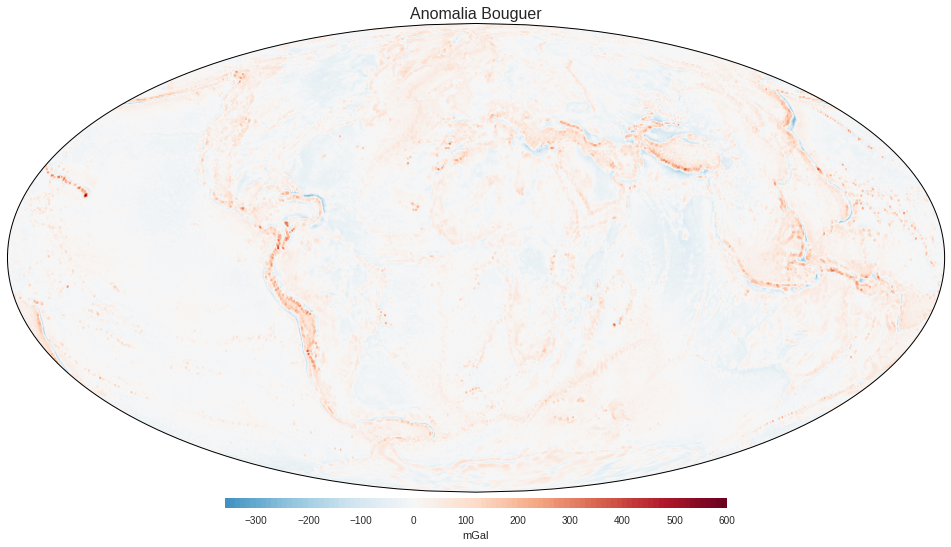

In [9]:
plt.figure(figsize=(18, 10))
ranges = np.abs([bouguer.min(), bouguer.max()]).max()
tmp = bm.contourf(x, y, bouguer, 100, tri=True, cmap='RdBu_r', vmin=-ranges, vmax=ranges)
plt.colorbar(orientation='horizontal', pad=0.01, aspect=50, shrink=0.5).set_label('mGal')
plt.title(r"Anomalia Bouguer", fontsize=16)

## Isostasia segundo o modelo de Airy